In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [171]:
data_path = 'C:\\Users\\elift\\Desktop\\cs210\\DSA210\\data\\Health_Records_for_2024.csv'

In [172]:
data = pd.read_csv(data_path, low_memory=False)

In [173]:
data.columns

Index(['Unnamed: 0', 'type', 'sourceName', 'sourceVersion', 'device', 'unit',
       'creationDate', 'startDate', 'endDate', 'value'],
      dtype='object')

In [174]:
unique_values = data["type"].unique()
print(unique_values)

['HKQuantityTypeIdentifierStepCount'
 'HKQuantityTypeIdentifierDistanceWalkingRunning'
 'HKQuantityTypeIdentifierBasalEnergyBurned'
 'HKQuantityTypeIdentifierActiveEnergyBurned'
 'HKQuantityTypeIdentifierFlightsClimbed'
 'HKQuantityTypeIdentifierHeadphoneAudioExposure'
 'HKQuantityTypeIdentifierWalkingDoubleSupportPercentage'
 'HKQuantityTypeIdentifierWalkingSpeed'
 'HKQuantityTypeIdentifierWalkingStepLength'
 'HKQuantityTypeIdentifierWalkingAsymmetryPercentage'
 'HKQuantityTypeIdentifierAppleWalkingSteadiness'
 'HKCategoryTypeIdentifierSleepAnalysis']


We are only interested in StepCount here

In [175]:
filtered_data = data[data["type"] == "HKQuantityTypeIdentifierStepCount"]
filtered_data.head()

,Unnamed: 0,type,sourceName,sourceVersion,device,unit,creationDate,startDate,endDate,value
0,60526,HKQuantityTypeIdentifierStepCount,Elif tuana iPhone'u,14.4.2,"<<HKDevice: 0x302add860>, name:iPhone, manufac...",count,2024-01-01 00:40:00+03:00,2024-01-01 00:17:12+03:00,2024-01-01 00:17:17+03:00,12.0
1,60527,HKQuantityTypeIdentifierStepCount,Elif tuana iPhone'u,14.4.2,"<<HKDevice: 0x302add860>, name:iPhone, manufac...",count,2024-01-01 00:51:22+03:00,2024-01-01 00:40:19+03:00,2024-01-01 00:40:58+03:00,14.0
2,60528,HKQuantityTypeIdentifierStepCount,Elif tuana iPhone'u,14.4.2,"<<HKDevice: 0x302add860>, name:iPhone, manufac...",count,2024-01-01 01:01:25+03:00,2024-01-01 00:50:22+03:00,2024-01-01 00:50:25+03:00,8.0
3,60529,HKQuantityTypeIdentifierStepCount,Elif tuana iPhone'u,14.4.2,"<<HKDevice: 0x302add860>, name:iPhone, manufac...",count,2024-01-01 15:08:05+03:00,2024-01-01 14:57:00+03:00,2024-01-01 14:57:15+03:00,33.0
4,60530,HKQuantityTypeIdentifierStepCount,Elif tuana iPhone'u,14.4.2,"<<HKDevice: 0x302add860>, name:iPhone, manufac...",count,2024-01-01 15:48:56+03:00,2024-01-01 15:37:53+03:00,2024-01-01 15:38:06+03:00,24.0


In [176]:
filtered_data["startDate"] = pd.to_datetime(filtered_data["startDate"], errors="coerce")
start_date = "2024-10-21"
end_date = "2024-12-24"
year_filtered_data = filtered_data[(filtered_data["startDate"] >= start_date) & (filtered_data["startDate"] <= end_date)]
print(year_filtered_data.size)

13140


C:\Users\elift\AppData\Local\Temp\ipykernel_29976\3197754072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["startDate"] = pd.to_datetime(filtered_data["startDate"], errors="coerce")


In [177]:
column_reduced_data = year_filtered_data[["startDate","endDate","value"]]
column_reduced_data

,startDate,endDate,value
6220,2024-10-21 00:24:16+03:00,2024-10-21 00:24:23+03:00,6.0
6221,2024-10-21 11:31:13+03:00,2024-10-21 11:38:09+03:00,736.0
6222,2024-10-21 13:34:57+03:00,2024-10-21 13:44:06+03:00,607.0
6223,2024-10-21 13:50:16+03:00,2024-10-21 13:51:07+03:00,55.0
6224,2024-10-21 14:37:35+03:00,2024-10-21 14:43:33+03:00,405.0
...,...,...,...
7529,2024-12-23 17:59:37+03:00,2024-12-23 18:02:51+03:00,71.0
7530,2024-12-23 18:22:48+03:00,2024-12-23 18:31:18+03:00,288.0
7531,2024-12-23 18:42:30+03:00,2024-12-23 18:50:53+03:00,160.0
7532,2024-12-23 18:52:42+03:00,2024-12-23 18:58:45+03:00,291.0


In [178]:
renamed_data = column_reduced_data.rename(columns={"value": "stepCount"})
renamed_data.head()

,startDate,endDate,stepCount
6220,2024-10-21 00:24:16+03:00,2024-10-21 00:24:23+03:00,6.0
6221,2024-10-21 11:31:13+03:00,2024-10-21 11:38:09+03:00,736.0
6222,2024-10-21 13:34:57+03:00,2024-10-21 13:44:06+03:00,607.0
6223,2024-10-21 13:50:16+03:00,2024-10-21 13:51:07+03:00,55.0
6224,2024-10-21 14:37:35+03:00,2024-10-21 14:43:33+03:00,405.0


In [179]:
renamed_data.dtypes


startDate    datetime64[ns, UTC+03:00]
endDate                         object
stepCount                       object
dtype: object

Here stepCount is not a float seemingly it is an object type. We need to convert it to float

In [180]:
renamed_data["stepCount"] = pd.to_numeric(renamed_data["stepCount"], errors="coerce")

# Display the updated DataFrame to confirm conversion
print(renamed_data.head())

                     startDate                    endDate  stepCount
6220 2024-10-21 00:24:16+03:00  2024-10-21 00:24:23+03:00        6.0
6221 2024-10-21 11:31:13+03:00  2024-10-21 11:38:09+03:00      736.0
6222 2024-10-21 13:34:57+03:00  2024-10-21 13:44:06+03:00      607.0
6223 2024-10-21 13:50:16+03:00  2024-10-21 13:51:07+03:00       55.0
6224 2024-10-21 14:37:35+03:00  2024-10-21 14:43:33+03:00      405.0


In [181]:
renamed_data['date'] = renamed_data['startDate'].dt.date
daily_data = renamed_data.groupby('date')['stepCount'].sum().reset_index()

daily_data.columns = ['date', 'dailyStepCount']
daily_data.head()

,date,dailyStepCount
0,2024-10-21,2993.0
1,2024-10-22,9459.0
2,2024-10-23,9230.0
3,2024-10-24,6840.0
4,2024-10-25,7122.0


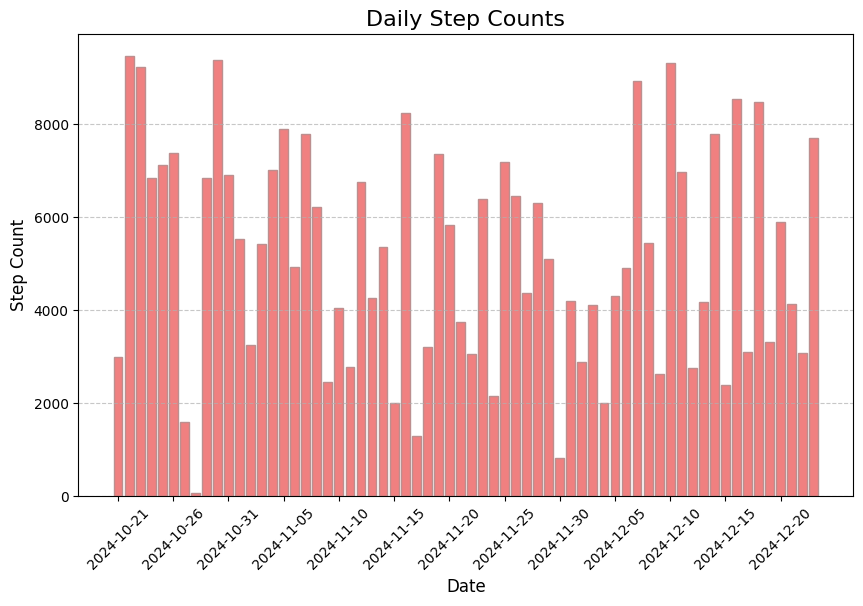

In [182]:
plt.figure(figsize=(10, 6))
plt.bar(daily_data['date'], daily_data['dailyStepCount'], color='lightcoral', edgecolor='rosybrown')
plt.title('Daily Step Counts', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Step Count', fontsize=12)

# Adjust x-axis ticks to show fewer intervals for better readability
plt.xticks(ticks=daily_data['date'][::5], rotation=45)  # Show every 5th date

plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for y-axis
plt.show()

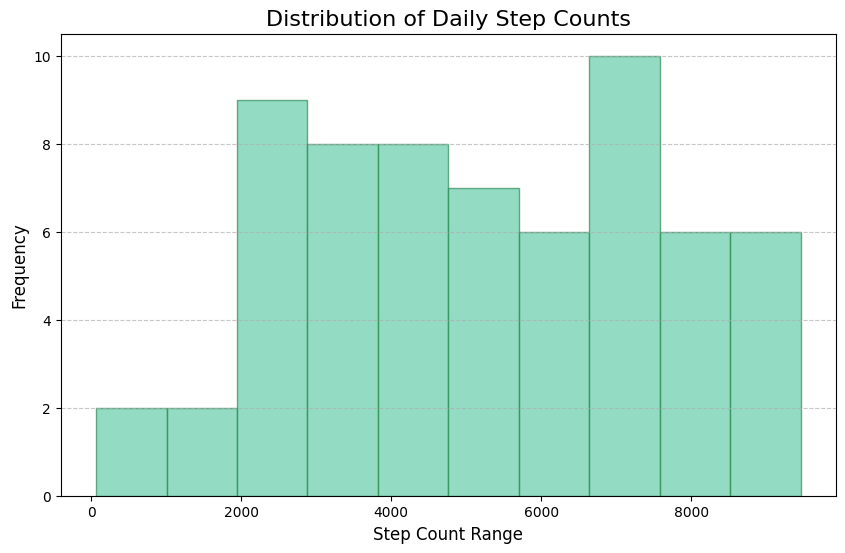

In [183]:
plt.figure(figsize=(10, 6))
plt.hist(daily_data['dailyStepCount'], bins=10, color='mediumaquamarine', edgecolor='seagreen', alpha=0.7)
plt.title('Distribution of Daily Step Counts', fontsize=16)
plt.xlabel('Step Count Range', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

To see if there is any trend

In [184]:
daily_data.head()

,date,dailyStepCount
0,2024-10-21,2993.0
1,2024-10-22,9459.0
2,2024-10-23,9230.0
3,2024-10-24,6840.0
4,2024-10-25,7122.0


In [185]:
excel_path = r'C:\\Users\\elift\\Desktop\\cs210\\DSA210\\data\\final.csv'
excel_data = pd.read_csv(excel_path,delimiter=";")
excel_data.head()

,date,Sleep_Hours,Anxiety_Level,new_rating
0,21.10.2024,8,1,3
1,22.10.2024,7,3,5
2,23.10.2024,7,5,4
3,24.10.2024,8,5,4
4,25.10.2024,6,4,5


In [186]:
excel_data['date'] = pd.to_datetime(excel_data['date'], dayfirst=True)
daily_data['date'] = pd.to_datetime(daily_data['date'], dayfirst=True)
daily_data.head()

,date,dailyStepCount
0,2024-10-21,2993.0
1,2024-10-22,9459.0
2,2024-10-23,9230.0
3,2024-10-24,6840.0
4,2024-10-25,7122.0


In [187]:
merged_data = pd.merge(daily_data, excel_data, on='date', how='inner')

In [188]:
merged_data

,date,dailyStepCount,Sleep_Hours,Anxiety_Level,new_rating
0,2024-10-21,2993.0,8,1,3
1,2024-10-22,9459.0,7,3,5
2,2024-10-23,9230.0,7,5,4
3,2024-10-24,6840.0,8,5,4
4,2024-10-25,7122.0,6,4,5
...,...,...,...,...,...
59,2024-12-19,3314.0,7,4,2
60,2024-12-20,5887.0,8,5,2
61,2024-12-21,4122.0,6,1,3
62,2024-12-22,3077.0,9,3,3


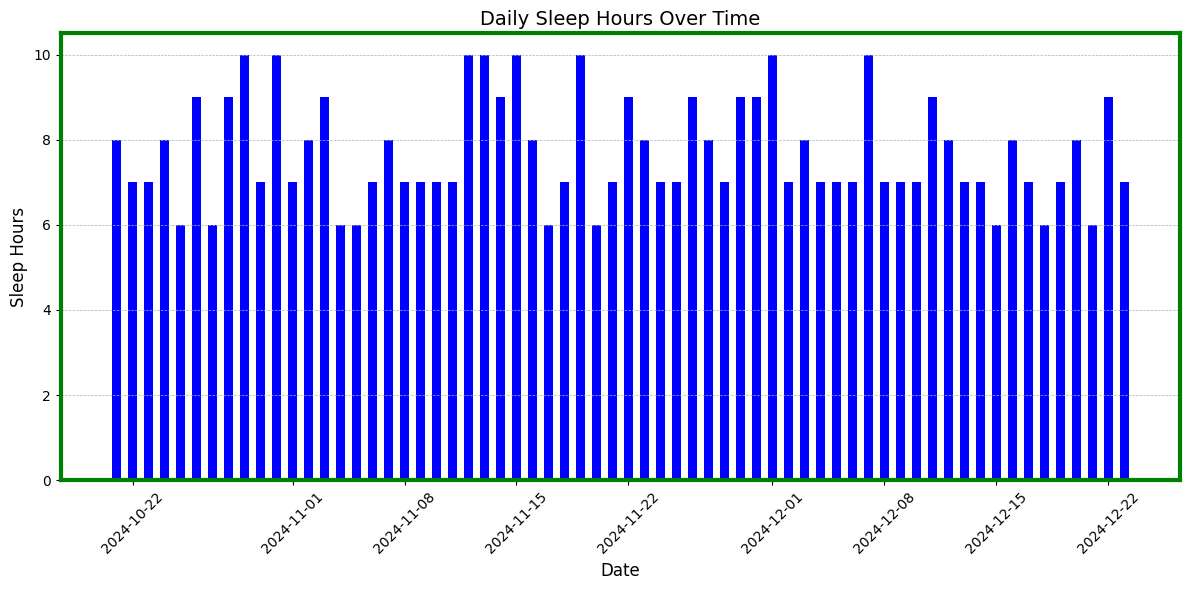

In [189]:
dates = merged_data['date']
sleep_hours = merged_data['Sleep_Hours']

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(dates, sleep_hours, color='blue', width=0.6)

# Add labels, title, and grid
plt.title("Daily Sleep Hours Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sleep Hours", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)

# Add a green border around the plot area
plt.gca().spines['top'].set_color('green')
plt.gca().spines['bottom'].set_color('green')
plt.gca().spines['left'].set_color('green')
plt.gca().spines['right'].set_color('green')
plt.gca().spines['top'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

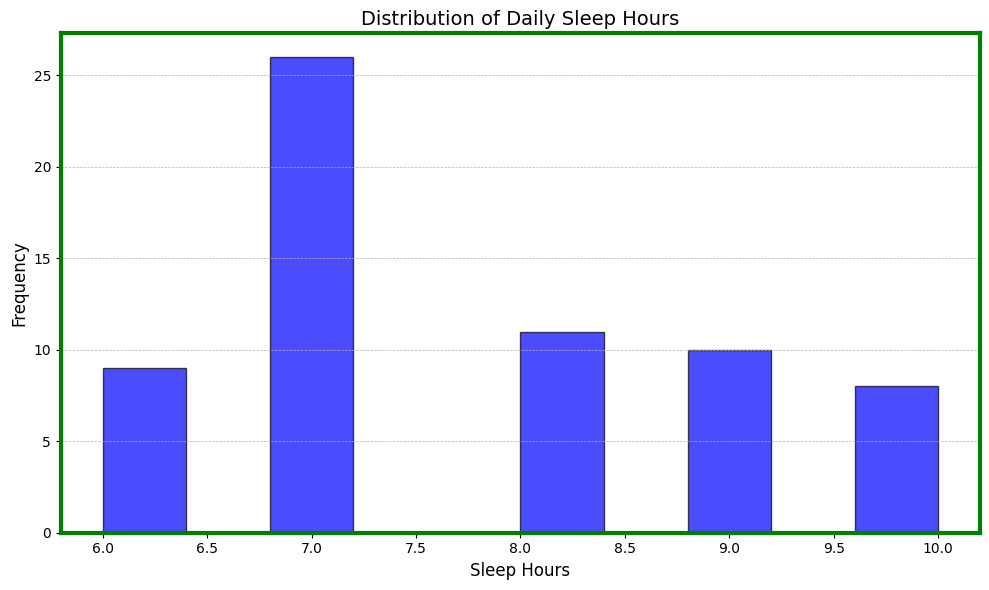

In [190]:
sleep_hours = merged_data['Sleep_Hours']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(sleep_hours, bins=10, color='blue', edgecolor='black', alpha=0.7)

# Add labels, title, and grid
plt.title("Distribution of Daily Sleep Hours", fontsize=14)
plt.xlabel("Sleep Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Add a green border around the plot area
plt.gca().spines['top'].set_color('green')
plt.gca().spines['bottom'].set_color('green')
plt.gca().spines['left'].set_color('green')
plt.gca().spines['right'].set_color('green')
plt.gca().spines['top'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)

# Show the plot
plt.tight_layout()
plt.show()

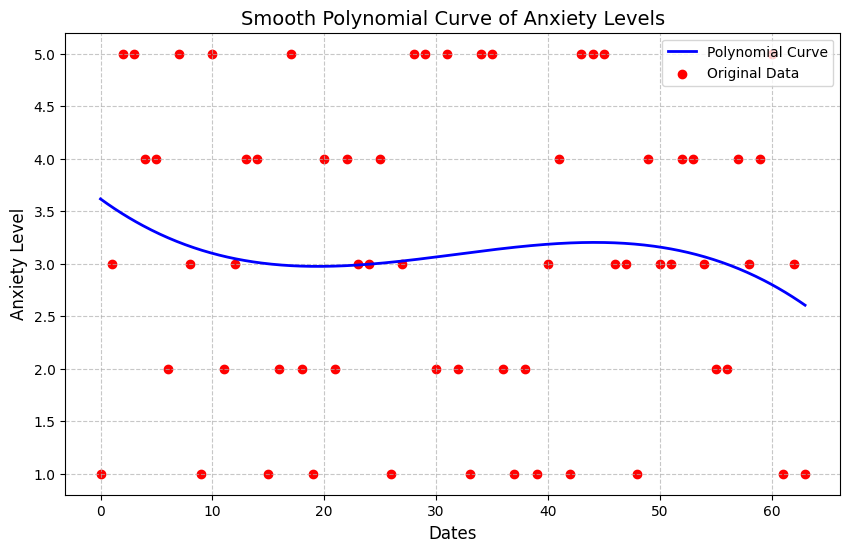

In [191]:
x = np.arange(len(merged_data['date']))  
y = merged_data['Anxiety_Level']


coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)


x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = polynomial(x_smooth)


plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', linewidth=2, label='Polynomial Curve')
plt.scatter(x, y, color='red', label='Original Data')  # Add original data points

# Add labels, title, and legend
plt.title("Smooth Polynomial Curve of Anxiety Levels", fontsize=14)
plt.xlabel("Dates", fontsize=12)
plt.ylabel("Anxiety Level", fontsize=12)
plt.legend()


plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

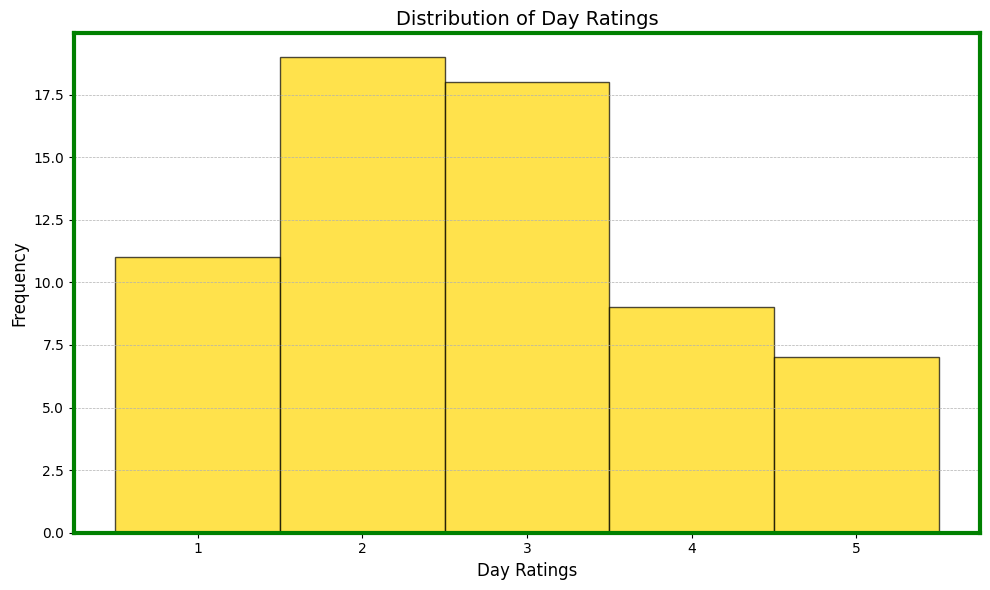

In [192]:
# Create the histogram
day_ratings = merged_data['new_rating']
plt.figure(figsize=(10, 6))

# Define bins to include all possible day ratings
bins = [1, 2, 3, 4, 5, 6]

# Create the histogram
plt.hist(day_ratings, bins=bins, color='gold', edgecolor='black', alpha=0.7, align='left')

# Add labels, title, and grid
plt.title("Distribution of Day Ratings", fontsize=14)
plt.xlabel("Day Ratings", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Set x-axis ticks to show integers centered on bins
plt.xticks(range(1, 6))

# Add a green border around the plot area
plt.gca().spines['top'].set_color('green')
plt.gca().spines['bottom'].set_color('green')
plt.gca().spines['left'].set_color('green')
plt.gca().spines['right'].set_color('green')
plt.gca().spines['top'].set_linewidth(3)
plt.gca().spines['bottom'].set_linewidth(3)
plt.gca().spines['left'].set_linewidth(3)
plt.gca().spines['right'].set_linewidth(3)

# Show the plot
plt.tight_layout()
plt.show()


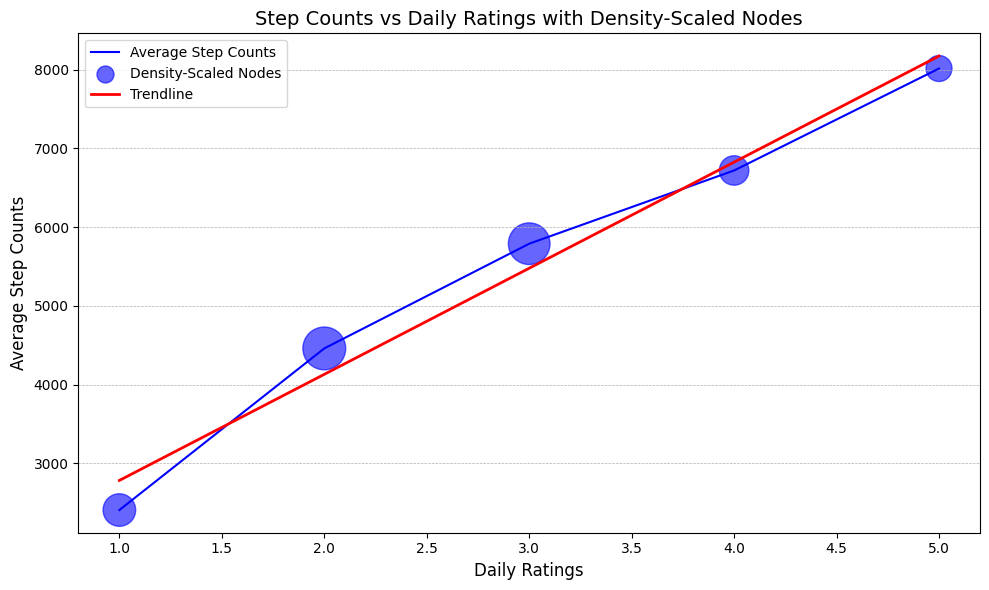

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Aggregate step counts by daily ratings and sort
aggregated_data = merged_data.groupby('new_rating')['dailyStepCount'].mean().sort_index()
x = aggregated_data.index  # Sorted ratings (1.0, 2.0, etc.)
y = aggregated_data.values  # Corresponding average step counts

# Calculate density (frequency of each day rating)
density = merged_data['new_rating'].value_counts().sort_index()

# Scale the marker size based on density (adjust scaling factor if needed)
marker_sizes = density * 50  # Scale by a factor of 50 for better visualization

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the line graph with density-scaled markers
plt.plot(x, y, linestyle='-', color='blue', label='Average Step Counts')
plt.scatter(x, y, s=marker_sizes, color='blue', alpha=0.6, label='Density-Scaled Nodes')

# Fit and plot a trendline
z = np.polyfit(x, y, 1)  # Fit a linear trendline
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linewidth=2, label='Trendline')

# Add labels, title, and legend
plt.title("Step Counts vs Daily Ratings with Density-Scaled Nodes", fontsize=14)
plt.xlabel("Daily Ratings", fontsize=12)
plt.ylabel("Average Step Counts", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
handles[1] = plt.scatter([], [], s=150, color='blue', alpha=0.6, label='Density-Scaled Nodes')  # Smaller size
plt.legend(handles=handles, loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


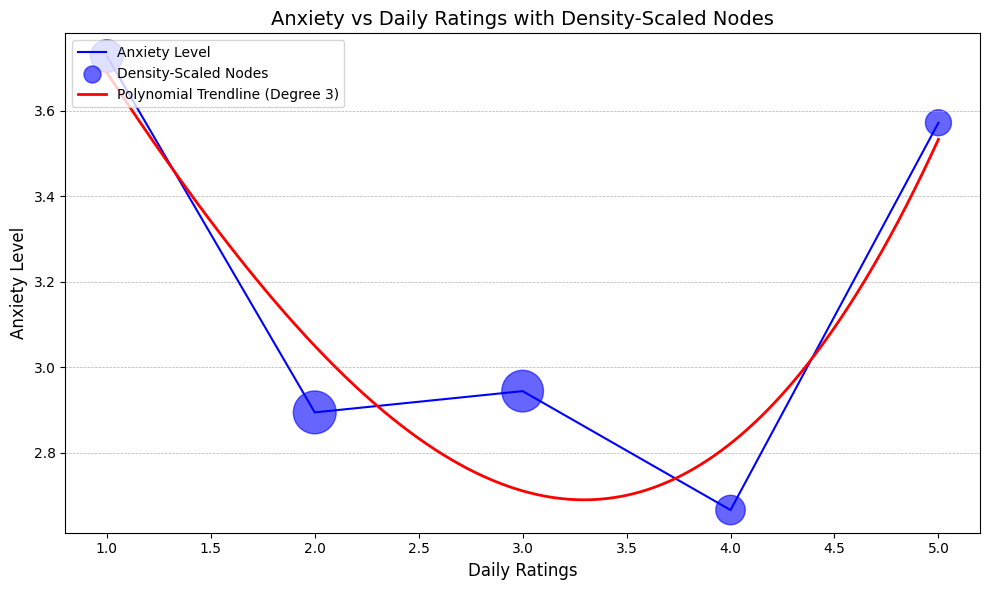

In [194]:
# Aggregate step counts by daily ratings and sort
aggregated_data = merged_data.groupby('new_rating')['Anxiety_Level'].mean().sort_index()
x = aggregated_data.index  # Sorted ratings (1.0, 2.0, etc.)
y = aggregated_data.values  # Corresponding average anxiety levels

# Calculate density (frequency of each day rating)
density = merged_data['new_rating'].value_counts().sort_index()

# Scale the marker size based on density (adjust scaling factor if needed)
marker_sizes = density * 50  # Scale by a factor of 50 for better visualization

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the line graph with density-scaled markers
plt.plot(x, y, linestyle='-', color='blue', label='Anxiety Level')
plt.scatter(x, y, s=marker_sizes, color='blue', alpha=0.6, label='Density-Scaled Nodes')

# Fit and plot a polynomial curvy trendline
degree = 3  # Degree of the polynomial (adjust as needed)
z = np.polyfit(x, y, degree)  # Fit a polynomial of the specified degree
p = np.poly1d(z)
x_smooth = np.linspace(x.min(), x.max(), 500)  # Generate smooth x values for the curve
plt.plot(x_smooth, p(x_smooth), color='red', linewidth=2, label=f'Polynomial Trendline (Degree {degree})')

# Add labels, title, and legend
plt.title("Anxiety vs Daily Ratings with Density-Scaled Nodes", fontsize=14)
plt.xlabel("Daily Ratings", fontsize=12)
plt.ylabel("Anxiety Level", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
handles[1] = plt.scatter([], [], s=150, color='blue', alpha=0.6, label='Density-Scaled Nodes')  # Smaller size for legend
plt.legend(handles=handles, loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


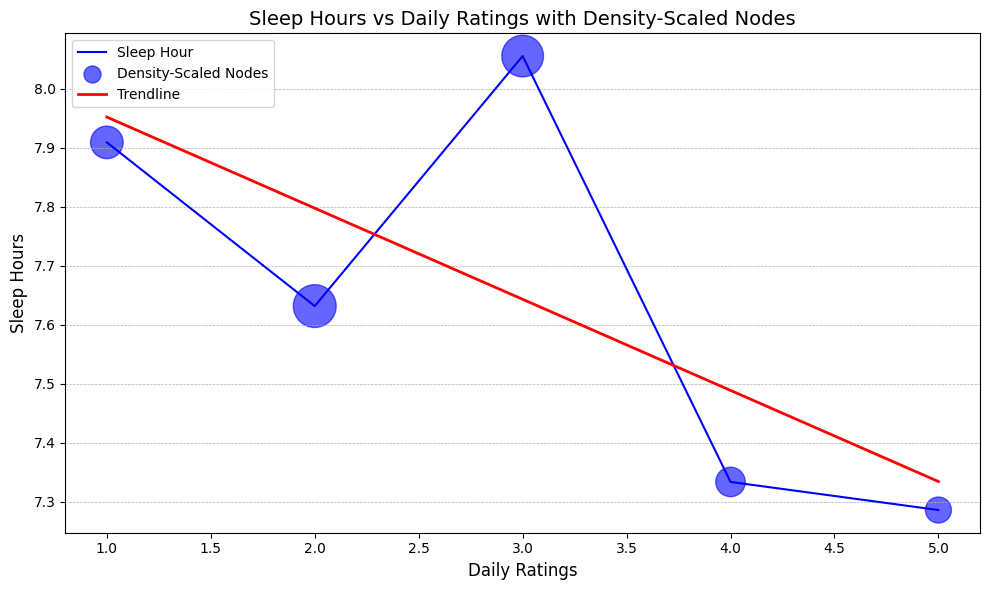

In [195]:
import numpy as np
import matplotlib.pyplot as plt

# Aggregate step counts by daily ratings and sort
aggregated_data = merged_data.groupby('new_rating')['Sleep_Hours'].mean().sort_index()
x = aggregated_data.index  # Sorted ratings (1.0, 2.0, etc.)
y = aggregated_data.values  # Corresponding average step counts

# Calculate density (frequency of each day rating)
density = merged_data['new_rating'].value_counts().sort_index()

# Scale the marker size based on density (adjust scaling factor if needed)
marker_sizes = density * 50  # Scale by a factor of 50 for better visualization

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the line graph with density-scaled markers
plt.plot(x, y, linestyle='-', color='blue', label='Sleep Hour')
plt.scatter(x, y, s=marker_sizes, color='blue', alpha=0.6, label='Density-Scaled Nodes')

# Fit and plot a trendline
z = np.polyfit(x, y, 1)  # Fit a linear trendline
p = np.poly1d(z)
plt.plot(x, p(x), color='red', linewidth=2, label='Trendline')

# Add labels, title, and legend
plt.title("Sleep Hours vs Daily Ratings with Density-Scaled Nodes", fontsize=14)
plt.xlabel("Daily Ratings", fontsize=12)
plt.ylabel("Sleep Hours", fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
handles[1] = plt.scatter([], [], s=150, color='blue', alpha=0.6, label='Density-Scaled Nodes')  # Smaller size
plt.legend(handles=handles, loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

# Show the plot
plt.tight_layout()
plt.show()


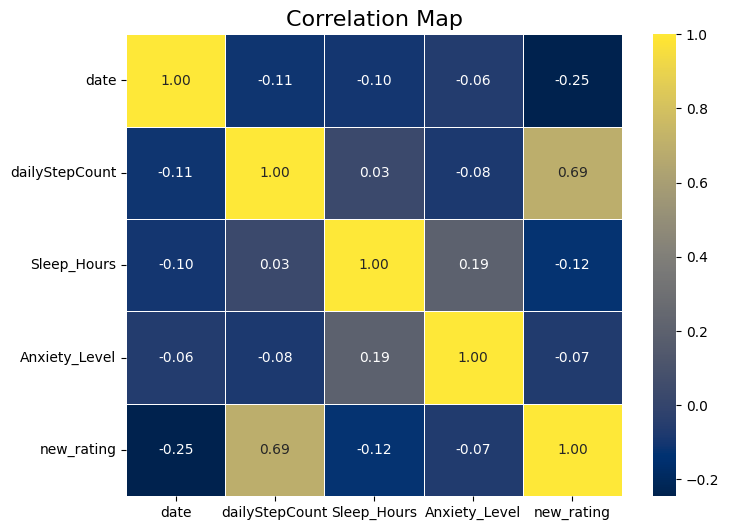

In [196]:
corr = merged_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='cividis', fmt=".2f", linewidths=0.5)

# Add title and labels
plt.title('Correlation Map', fontsize=16)
plt.show()

In [197]:
merged_data.head()

,date,dailyStepCount,Sleep_Hours,Anxiety_Level,new_rating
0,2024-10-21,2993.0,8,1,3
1,2024-10-22,9459.0,7,3,5
2,2024-10-23,9230.0,7,5,4
3,2024-10-24,6840.0,8,5,4
4,2024-10-25,7122.0,6,4,5


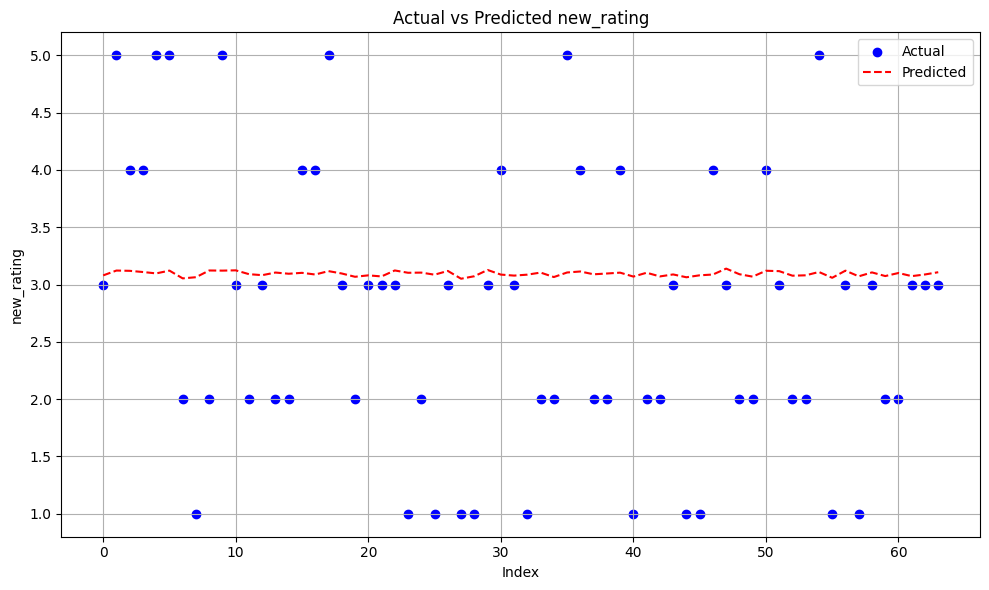

In [198]:
from sklearn.linear_model import LinearRegression


X = merged_data[['dailyStepCount', 'Sleep_Hours', 'Anxiety_Level']]
y = merged_data['new_rating']

model = LinearRegression()
model.fit(X, y)

model.fit(X, y)

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y)), y, label='Actual', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted', color='red', linestyle='--')
plt.title("Actual vs Predicted new_rating")
plt.xlabel("Index")
plt.ylabel("new_rating")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [200]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(merged_data['Sleep_Hours'], merged_data['new_rating'])
print(f"P-value for Sleep Hours: {p_value}")


P-value for Sleep Hours: 0.32713983279648845


In [203]:
corr, p_value = pearsonr(merged_data['Anxiety_Level'], merged_data['new_rating'])
print(f"P-value for Anxiety Level: {p_value}")


P-value for Anxiety Level: 0.6017088275978877


In [204]:
corr, p_value = pearsonr(merged_data['dailyStepCount'], merged_data['new_rating'])
print(f"P-value for Step Counts: {p_value}")


P-value for Step Counts: 2.7294399552362156e-10
